In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 4\10-2023 Instacart Basket Analysis'

In [3]:
#import data orders_products_customers_active_merged.pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active_merged.pkl'))

### 1. Busiest Days of Week and Busiest Hours of Day

In [28]:
#create day of week key 
day_of_week_key = {'0':'Saturday',
                   '1': 'Sunday',
                   '2': 'Monday',
                   '3': 'Tuesday',
                   '4': 'Wendesday',
                   '5': 'Thursday',
                   '6': 'Friday'}

In [10]:
#check data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30963910 entries, 0 to 32404156
Data columns (total 35 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   day_of_week                    int8    
 4   hour_of_day                    int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float32 
 13  busyness                       category
 14  busiest_period_of_day          category
 15  max_order                      int8    
 16  loyalty_flag                   category
 17  avg_price                     

In [11]:
df['day_of_week'] = df['day_of_week'].astype('str')

In [30]:
#create a new data frame and change day of week from number to name
df_2 = df.replace({'day_of_week' : day_of_week_key})

In [31]:
#check output
df_2['day_of_week'].value_counts()

day_of_week
Saturday     5908523
Sunday       5411563
Friday       4291234
Thursday     4033606
Monday       4024610
Tuesday      3669457
Wendesday    3624917
Name: count, dtype: int64

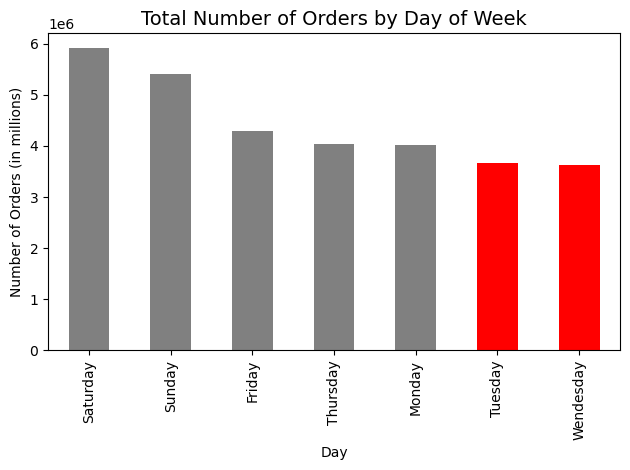

In [35]:
#create a chart representing busiest days of the week (highlight less busy days)
day_of_week_bar = df_2['day_of_week'].value_counts().plot.bar(color = ['grey', 'grey', 'grey', 'grey', 'grey', 'red', 'red'])
plt.xlabel ('Day', fontsize = 10)
plt.ylabel ('Number of Orders (in millions)', fontsize = 10)
plt.title ('Total Number of Orders by Day of Week', fontsize = 14)
plt.tight_layout()

In [36]:
#check frequency of orders per hour of day
df['hour_of_day'].value_counts()

hour_of_day
10    2649685
11    2614820
14    2567851
13    2539230
15    2535910
12    2495746
16    2413625
9     2363561
17    1982296
8     1659064
18    1551156
19    1193850
20     930893
7      863190
21     763100
22     607055
23     384549
6      281007
0      208040
1      109621
5       84416
2       65688
4       50762
3       48795
Name: count, dtype: int64

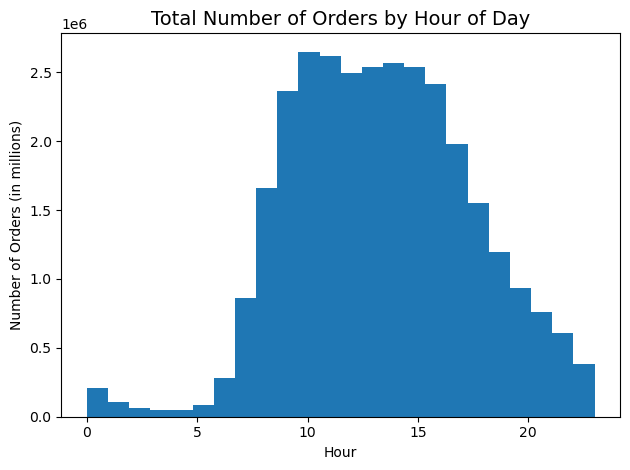

In [39]:
#create a histogram of the number of orders per hour 
hour_of_day_hist = df['hour_of_day'].plot.hist(bins = 24)
plt.xlabel ('Hour', fontsize = 10)
plt.ylabel ('Number of Orders (in millions)', fontsize = 10)
plt.title ('Total Number of Orders by Hour of Day', fontsize = 14)
plt.tight_layout()

### 2. Hours of Day when people spend the most money

In [4]:
#group data by hour of day and then aggregate the sum of prices which will represent which hour spends the most money
df_3 = df.groupby('hour_of_day').agg({'prices' : ['sum']})

In [5]:
df_3

,prices
,sum
hour_of_day,
0,1.624981e+06
1,8.556431e+05
2,5.125261e+05
3,3.819733e+05
4,3.980087e+05
5,6.609575e+05
6,2.197097e+06
7,6.750456e+06


In [6]:
df_3.mean()

prices  sum    10049593.0
dtype: float32

In [7]:
df_3['prices'].mean()

sum    10049593.0
dtype: float32

Text(0.5, -0.1, 'This represents the sum of all product prices, from all orders, by the hour of the day.')

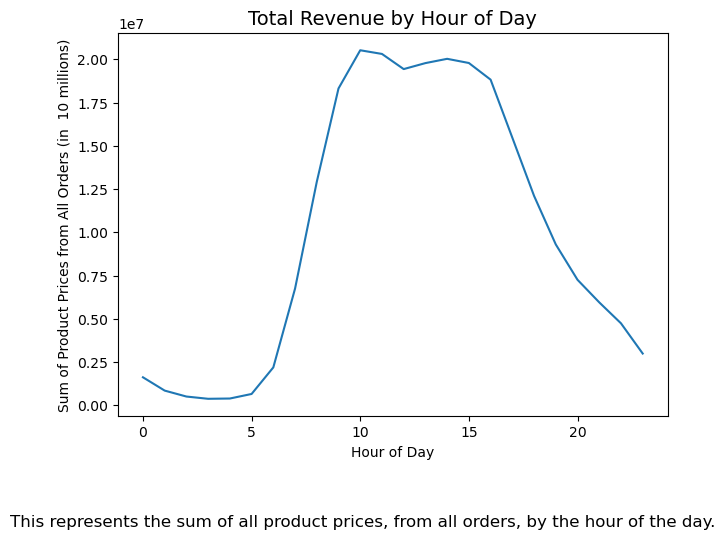

In [24]:
#create a bar chart representing the sum of prices from all orders by hour of day
revenue_by_hour_bar = df_3.plot.line(legend = False)
plt.xlabel ('Hour of Day', fontsize = 10)
plt.ylabel ('Sum of Product Prices from All Orders (in  10 millions)', fontsize = 10)
plt.title ('Total Revenue by Hour of Day', fontsize = 14)
plt.tight_layout()
plt.figtext (0.5, -0.1,'This represents the sum of all product prices, from all orders, by the hour of the day.', ha='center', va='center', fontsize=12)

### This section is really useful for learning how to better use the groupby function but we can skip over it for now

In [54]:
#create a dataframe that groups data by order_id and then sum of prices
df_4 = df.groupby('order_id').agg({'prices' : ['sum']})

In [55]:
#check output
df_4

,prices
,sum
order_id,
2,91.599609
3,70.300781
4,92.811523
5,210.683594
6,27.496094
...,...
3421079,1.599609
3421080,75.801758


In [60]:
df_4['prices'].mean()

sum    78.707916
dtype: float32

In [57]:
df_4['prices'].max()

sum    1092.204102
dtype: float32

In [58]:
df_4['prices'].min()

sum    0.0
dtype: float32

In [61]:
df_5 = df.groupby('order_id')['prices'].sum()

In [62]:
df_6 = df_5.mean()

In [63]:
df_6

78.70792

In [65]:
df_5.max()

1092.2041015625

In [66]:
df_5.min()

0.0

In [67]:
df_5.mean()

78.70792

### 2. Continued. This will be the better visualization

In [16]:
df_7 = df.groupby(['hour_of_day', 'order_id']).agg({'prices' : ['sum']})

In [17]:
df_7

prices
                             sum
hour_of_day order_id            
0           30         29.599609
            47         43.692383
            48         63.500000
            361       170.808594
            445         9.098633
...                          ...
23          3420918    88.602539
            3420933   173.402344
            3420973    58.792969
            3421004   112.597656
            3421020    82.003906

[3064370 rows x 1 columns]

In [18]:
df_7['prices'].max()

sum    1092.204102
dtype: float32

In [19]:
df_7['prices'].mean()

sum    78.707939
dtype: float32

In [22]:
df_10 = df_7.groupby('hour_of_day')['prices'].mean()

In [23]:
df_10

,prices
,sum
hour_of_day,
0,80.083839
1,77.962929
2,76.679543
3,78.757378
4,81.077354
5,77.268822
6,79.166107
7,80.713287


In [40]:
colors = [ 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'red', 'red', 'red']

Text(0.5, -0.1, 'Data was grouped by order id, then the product prices were aggregated to find the total amount spent on each order.\nThose values were then grouped by hour of day and then the average cost of orders was found.\nThe result is this graph, which represents the average amount spent on each order by hour of day.')

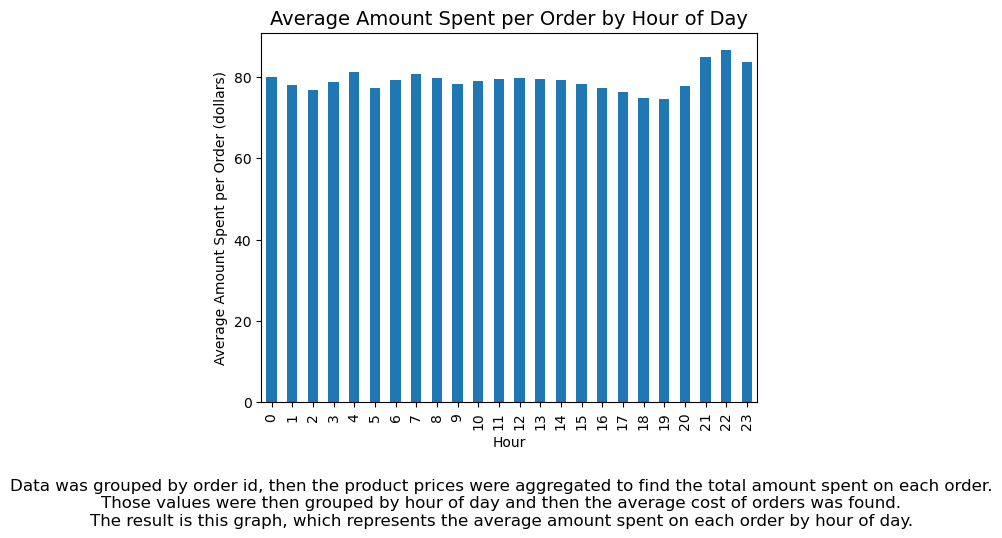

In [51]:
avg_spent_by_hour = df_10.plot.bar(legend = False)
plt.xlabel ('Hour', fontsize = 10)
plt.ylabel ('Average Amount Spent per Order (dollars)', fontsize = 10)
plt.title ('Average Amount Spent per Order by Hour of Day', fontsize = 14)
plt.figtext (0.5, -0.1,'Data was grouped by order id, then the product prices were aggregated to find the total amount spent on each order.\nThose values were then grouped by hour of day and then the average cost of orders was found.\nThe result is this graph, which represents the average amount spent on each order by hour of day.', ha='center', va='center', fontsize=12)

### 3. Most popular departments

In [4]:
#create a list of department_ids and names
departments = {'1': 'frozen',
               '2': 'other',
               '3': 'bakery',
               '4': 'produce',
               '5': 'alcohol',
               '6':'international',
               '7': 'beverages',
               '8': 'pets',
               '9': 'dry goods pasta',
               '10': 'bulk',
               '11': 'personal care',
               '12': 'meat seafood',
               '13': 'pantry',
               '14': 'breakfast',
               '15': 'canned goods',
               '16': 'dairy eggs',
               '17': 'household',
               '18': 'babies',
               '19': 'snacks',
               '20': 'deli',
               '21': 'missing'}

In [5]:
df['department_id'] = df['department_id'].astype('str')

In [11]:
#create a new dataframe which only contains order id and department id columns
df_depts = df[['order_id','department_id']]

In [12]:
df_depts['department_id'].value_counts()

department_id
4     9079273
16    5176528
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [14]:
#createa replace department_id numeric values with department list values
df_depts.replace({'department_id' : departments}, inplace = True)

C:\Users\jacob\AppData\Local\Temp\ipykernel_12404\881272921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_depts.replace({'department_id' : departments}, inplace = True)


In [15]:
df_depts['department_id'].value_counts()

department_id
produce            9079273
dairy eggs         5176528
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Popular Departments')

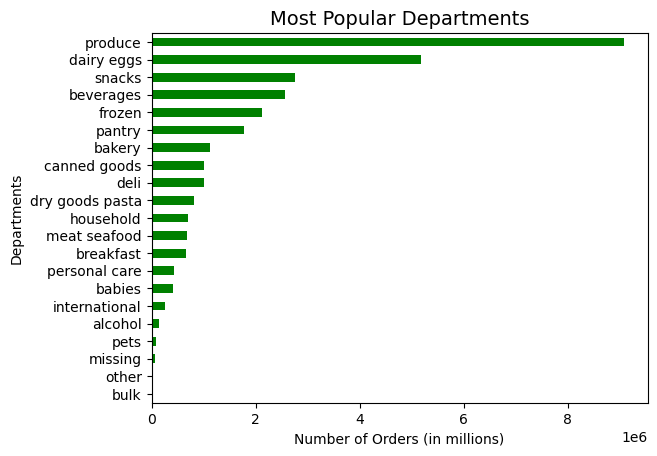

In [23]:
depts_bar = df_depts['department_id'].value_counts().sort_values(ascending = True).plot.barh(color = 'green', legend = False)
plt.xlabel ('Number of Orders (in millions)', fontsize = 10)
plt.ylabel ('Departments', fontsize = 10)
plt.title ('Most Popular Departments', fontsize = 14)

### 4. Loyalty Counts

Text(0.5, 1.0, 'Number of Customers by Loyalty Status')

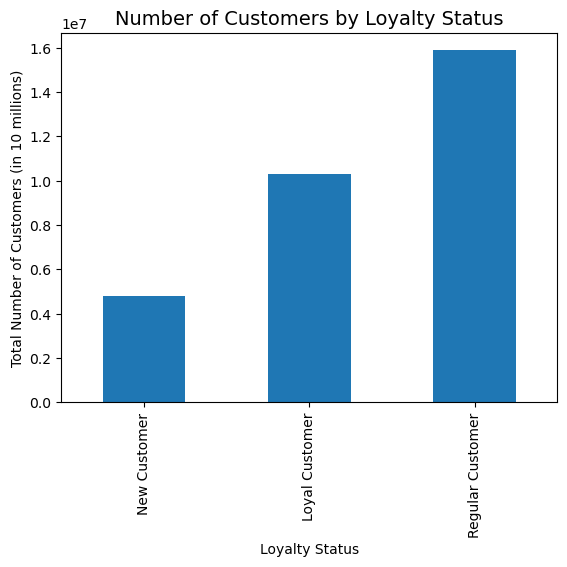

In [29]:
#create a bar chart for loyalty flags of customers
loyalty_bar = df['loyalty_flag'].value_counts().sort_values(ascending = True).plot.bar()
plt.xlabel ('Loyalty Status', fontsize = 10)
plt.ylabel ('Total Number of Orders (in 10 millions)', fontsize = 10)
plt.title ('Number of Customers by Loyalty Status', fontsize = 14)
plt.figtext (0.5, -0.1,'Data was grouped by order id, then the product prices were aggregated to find the total amount spent on each order.\nThose values were then grouped by hour of day and then the average cost of orders was found.\nThe result is this graph, which represents the average amount spent on each order by hour of day.', ha='center', va='center', fontsize=12)

In [28]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular Customer    15876363
Loyal Customer      10284010
New Customer         4803537
Name: count, dtype: int64

In [46]:
df_loyal = df.groupby(['loyalty_flag','user_id'])['loyalty_flag'].value_counts()

C:\Users\jacob\AppData\Local\Temp\ipykernel_12404\2628399820.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_loyal = df.groupby(['loyalty_flag','user_id'])['loyalty_flag'].value_counts()


In [47]:
df_loyal

loyalty_flag      user_id
Loyal Customer    1            0
                  2            0
                  3            0
                  4            0
                  7            0
                            ... 
Regular Customer  206203       0
                  206206       0
                  206207     223
                  206208       0
                  206209     129
Name: count, Length: 487893, dtype: int64

In [51]:
df.groupby(['user_id','max_order'])['loyalty_flag'].value_counts()

user_id  max_order  loyalty_flag    
1        5          Loyal Customer      0
                    Regular Customer    0
                    New Customer        0
         6          Loyal Customer      0
                    New Customer        0
                                       ..
206209   98         New Customer        0
                    Regular Customer    0
         99         Loyal Customer      0
                    New Customer        0
                    Regular Customer    0
Name: count, Length: 46349835, dtype: int64

In [53]:
df.groupby(by = 'user_id')['loyalty_flag'].value_counts()

user_id  loyalty_flag    
1        New Customer         59
         Regular Customer      0
         Loyal Customer        0
2        Regular Customer    195
         Loyal Customer        0
                            ... 
206208   Regular Customer      0
         New Customer          0
206209   Regular Customer    129
         New Customer          0
         Loyal Customer        0
Name: count, Length: 487893, dtype: int64

In [58]:
#create a dataframe that groups unique user ids by loyalty flag
df_loyal = df.groupby(by = 'loyalty_flag')['user_id'].nunique()

C:\Users\jacob\AppData\Local\Temp\ipykernel_12404\2560510464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_loyal = df.groupby(by = 'loyalty_flag')['user_id'].nunique()


In [59]:
#check output
df_loyal

loyalty_flag
Loyal Customer      17017
New Customer        68750
Regular Customer    76864
Name: user_id, dtype: int64

Text(0.5, -0.1, 'Loyal customers are any customer with 40 or more orders.\n New customers are customers with less than 10 orders.')

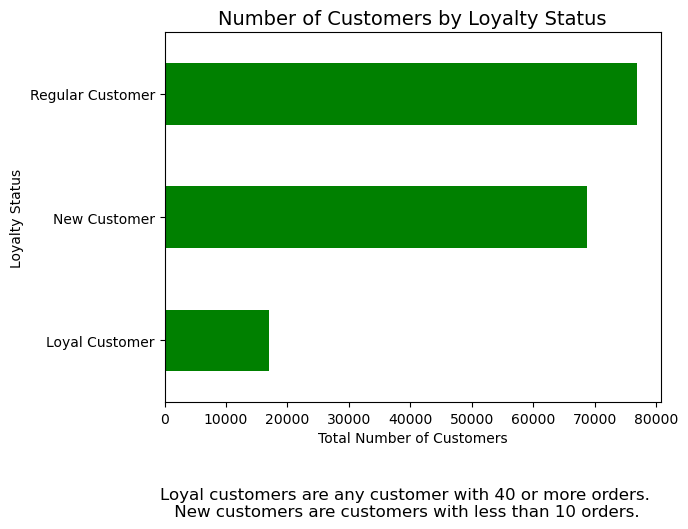

In [65]:
#create a bar chart that shows distrobution of customers by loyalty flag using df_loyal
df_loyal_bar = df_loyal.plot.barh(color = 'green')
plt.xlabel ('Total Number of Customers', fontsize = 10)
plt.ylabel ('Loyalty Status', fontsize = 10)
plt.title ('Number of Customers by Loyalty Status', fontsize = 14)
plt.figtext (0.5, -0.1,'Loyal customers are any customer with 40 or more orders.\n New customers are customers with less than 10 orders.', ha='center', va='center', fontsize=12)